In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\Yagnesh\Indian Liver Patient Dataset.csv')

In [98]:
df2 = df.copy()
le = LabelEncoder()
logic = LogisticRegression()
dtc = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators = 150)
scaler = StandardScaler()

In [99]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [100]:
df2 = df2.drop(columns = 'Albumin_and_Globulin_Ratio')

In [101]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,1
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1


In [102]:
df2['Gender'] = le.fit_transform(df2['Gender'])

<Axes: ylabel='Albumin'>

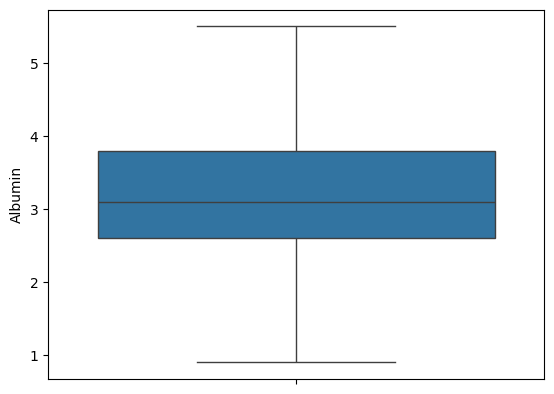

In [103]:
# sns.boxplot(df2['Total_Bilirubin'])
# sns.boxplot(df2['Direct_Bilirubin'])
# sns.boxplot(df2['Alkaline_Phosphotase'])
# sns.boxplot(df2['Alamine_Aminotransferase'])
sns.boxplot(df2['Albumin'])

In [104]:
def Outliers(df,columns):
    for i in columns:
        df[columns].astype(int)
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i]>upperlimit),i] = upperlimit
        df.loc[(df[i]<lowerlimit),i] = lowerlimit
    return df
cols = ['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens']
df2 = Outliers(df2,cols)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6048\362520095.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '481.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i]>upperlimit),i] = upperlimit
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6048\362520095.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i]>upperlimit),i] = upperlimit


<Axes: ylabel='Total_Bilirubin'>

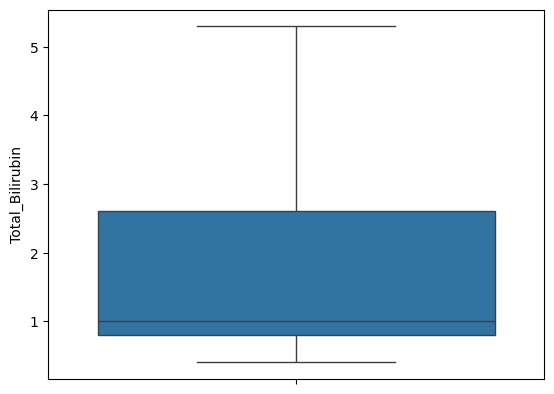

In [105]:
sns.boxplot(df2['Total_Bilirubin'])

In [106]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,0,0.7,0.10,187.00,16.0,18,6.8,3.3,1
1,62,1,5.3,2.95,481.75,64.0,100,7.5,3.2,1
2,62,1,5.3,2.95,481.75,60.0,68,7.0,3.3,1
3,58,1,1.0,0.40,182.00,14.0,20,6.8,3.4,1
4,72,1,3.9,2.00,195.00,27.0,59,7.3,2.4,1
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.10,481.75,20.0,34,5.9,1.6,2
579,40,1,0.6,0.10,98.00,35.0,31,6.0,3.2,1
580,52,1,0.8,0.20,245.00,48.0,49,6.4,3.2,1
581,31,1,1.3,0.50,184.00,29.0,32,6.8,3.4,1


In [107]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Dataset                       0
dtype: int64

In [108]:
x = df2.drop(columns = 'Dataset')
y = df2['Dataset']

In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 30)

In [110]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [111]:
logic.fit(xtrainscaled,ytrain)
logics = logic.score(xtestscaled,ytest)

In [112]:
dtc.fit(xtrainscaled,ytrain)
dtcs = dtc.score(xtestscaled,ytest)

In [113]:
model.fit(xtrainscaled,ytrain)
rfcs = model.score(xtestscaled,ytest)

In [114]:
print("Classification Score:")
print("LogisticRegression:",logics)
print("DecisionTreeClassifier:",dtcs)
print("RandomForestClassifier:",rfcs)

Classification Score:
LogisticRegression: 0.8
DecisionTreeClassifier: 0.7666666666666667
RandomForestClassifier: 0.8333333333333334
